In [2]:
import sys
import pandas as pd
import numpy as np

print("Python executable:", sys.executable)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)



Python executable: /Users/dondiego/Projects/ai-product-portfolio/01_user_conversion/.venv/bin/python
Pandas version: 2.3.3
Numpy version: 2.0.2


In [3]:
DATA_PATH = "../data/synthetic_user_conversion_data.csv"

df = pd.read_csv(DATA_PATH)

df.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier,converted
0,39,5,2.80,0,2,Tier_1,1
1,52,1,1.03,2,2,Tier_2,1
2,29,4,2.30,1,3,Tier_2,1
3,15,4,1.60,0,1,Tier_2,1
4,43,4,6.75,2,1,Tier_2,0


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   days_since_signup  5000 non-null   int64  
 1   sessions_7d        5000 non-null   int64  
 2   content_hours_7d   5000 non-null   float64
 3   downloads_7d       5000 non-null   int64  
 4   paywall_views_7d   5000 non-null   int64  
 5   country_tier       5000 non-null   object 
 6   converted          5000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 273.6+ KB


In [5]:
df["converted"].value_counts(normalize=True)
df["converted"].value_counts()


converted
1    4310
0     690
Name: count, dtype: int64

In [6]:
df.describe()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,converted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.125800,2.993200,2.985966,0.999200,1.225400,0.862000
std,16.910162,1.731171,2.132966,0.992268,1.098925,0.344934
min,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.430000,0.000000,0.000000,1.000000
50%,30.000000,3.000000,2.500000,1.000000,1.000000,1.000000
75%,45.000000,4.000000,3.982500,2.000000,2.000000,1.000000
max,59.000000,12.000000,22.210000,5.000000,7.000000,1.000000


In [7]:
df["country_tier"].value_counts(normalize=True)


country_tier
Tier_2    0.3838
Tier_1    0.3554
Tier_3    0.2608
Name: proportion, dtype: float64

In [8]:
df.groupby("converted")[[
    "sessions_7d",
    "downloads_7d",
    "paywall_views_7d",
    "content_hours_7d",
    "days_since_signup"
]].mean()


,sessions_7d,downloads_7d,paywall_views_7d,content_hours_7d,days_since_signup
converted,,,,,
0,2.288406,0.724638,0.882609,2.322159,33.133333
1,3.106032,1.043155,1.280278,3.092237,29.644316


In [9]:
df.corr(numeric_only=True)


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,converted
days_since_signup,1.000000,0.006336,0.013675,0.007755,0.009561,-0.071169
sessions_7d,0.006336,1.000000,-0.007274,-0.018752,0.013844,0.162911
content_hours_7d,0.013675,-0.007274,1.000000,0.005915,0.014259,0.124534
downloads_7d,0.007755,-0.018752,0.005915,1.000000,0.004201,0.110724
paywall_views_7d,0.009561,0.013844,0.014259,0.004201,1.000000,0.124822
converted,-0.071169,0.162911,0.124534,0.110724,0.124822,1.000000


In [10]:
TARGET = "converted"

FEATURES_NUMERIC = [
    "sessions_7d",
    "downloads_7d",
    "paywall_views_7d",
    "content_hours_7d",
    "days_since_signup",
]

FEATURES_CATEGORICAL = [
    "country_tier"
]

X = df[FEATURES_NUMERIC + FEATURES_CATEGORICAL]
y = df[TARGET]

X.head(), y.head()


(   sessions_7d  downloads_7d  paywall_views_7d  content_hours_7d  \
 0            5             0                 2              2.80   
 1            1             2                 2              1.03   
 2            4             1                 3              2.30   
 3            4             0                 1              1.60   
 4            4             2                 1              6.75   
 
    days_since_signup country_tier  
 0                 39       Tier_1  
 1                 52       Tier_2  
 2                 29       Tier_2  
 3                 15       Tier_2  
 4                 43       Tier_2  ,
 0    1
 1    1
 2    1
 3    1
 4    0
 Name: converted, dtype: int64)

In [11]:
X_encoded = pd.get_dummies(
    X,
    columns=FEATURES_CATEGORICAL,
    drop_first=True
)

X_encoded.head()


,sessions_7d,downloads_7d,paywall_views_7d,content_hours_7d,days_since_signup,country_tier_Tier_2,country_tier_Tier_3
0,5,0,2,2.80,39,False,False
1,1,2,2,1.03,52,True,False
2,4,1,3,2.30,29,True,False
3,4,0,1,1.60,15,True,False
4,4,2,1,6.75,43,True,False


In [12]:
X_encoded.info()
X_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessions_7d          5000 non-null   int64  
 1   downloads_7d         5000 non-null   int64  
 2   paywall_views_7d     5000 non-null   int64  
 3   content_hours_7d     5000 non-null   float64
 4   days_since_signup    5000 non-null   int64  
 5   country_tier_Tier_2  5000 non-null   bool   
 6   country_tier_Tier_3  5000 non-null   bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 205.2 KB


,sessions_7d,downloads_7d,paywall_views_7d,content_hours_7d,days_since_signup
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.993200,0.999200,1.225400,2.985966,30.125800
std,1.731171,0.992268,1.098925,2.132966,16.910162
min,0.000000,0.000000,0.000000,0.020000,1.000000
25%,2.000000,0.000000,0.000000,1.430000,16.000000
50%,3.000000,1.000000,1.000000,2.500000,30.000000
75%,4.000000,2.000000,2.000000,3.982500,45.000000
max,12.000000,5.000000,7.000000,22.210000,59.000000


In [13]:
y.value_counts(normalize=True)


converted
1    0.862
0    0.138
Name: proportion, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3750, 7), (1250, 7))

In [15]:
import pandas as pd

df = pd.read_csv("../data/synthetic_user_conversion_data.csv")
df.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier,converted
0,39,5,2.80,0,2,Tier_1,1
1,52,1,1.03,2,2,Tier_2,1
2,29,4,2.30,1,3,Tier_2,1
3,15,4,1.60,0,1,Tier_2,1
4,43,4,6.75,2,1,Tier_2,0


In [16]:
df.shape


(5000, 7)

In [17]:
df.dtypes


days_since_signup      int64
sessions_7d            int64
content_hours_7d     float64
downloads_7d           int64
paywall_views_7d       int64
country_tier          object
converted              int64
dtype: object

In [18]:
df["converted"].value_counts(normalize=True)


converted
1    0.862
0    0.138
Name: proportion, dtype: float64

In [19]:
df.describe()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,converted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.125800,2.993200,2.985966,0.999200,1.225400,0.862000
std,16.910162,1.731171,2.132966,0.992268,1.098925,0.344934
min,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.430000,0.000000,0.000000,1.000000
50%,30.000000,3.000000,2.500000,1.000000,1.000000,1.000000
75%,45.000000,4.000000,3.982500,2.000000,2.000000,1.000000
max,59.000000,12.000000,22.210000,5.000000,7.000000,1.000000


Matplotlib is building the font cache; this may take a moment.


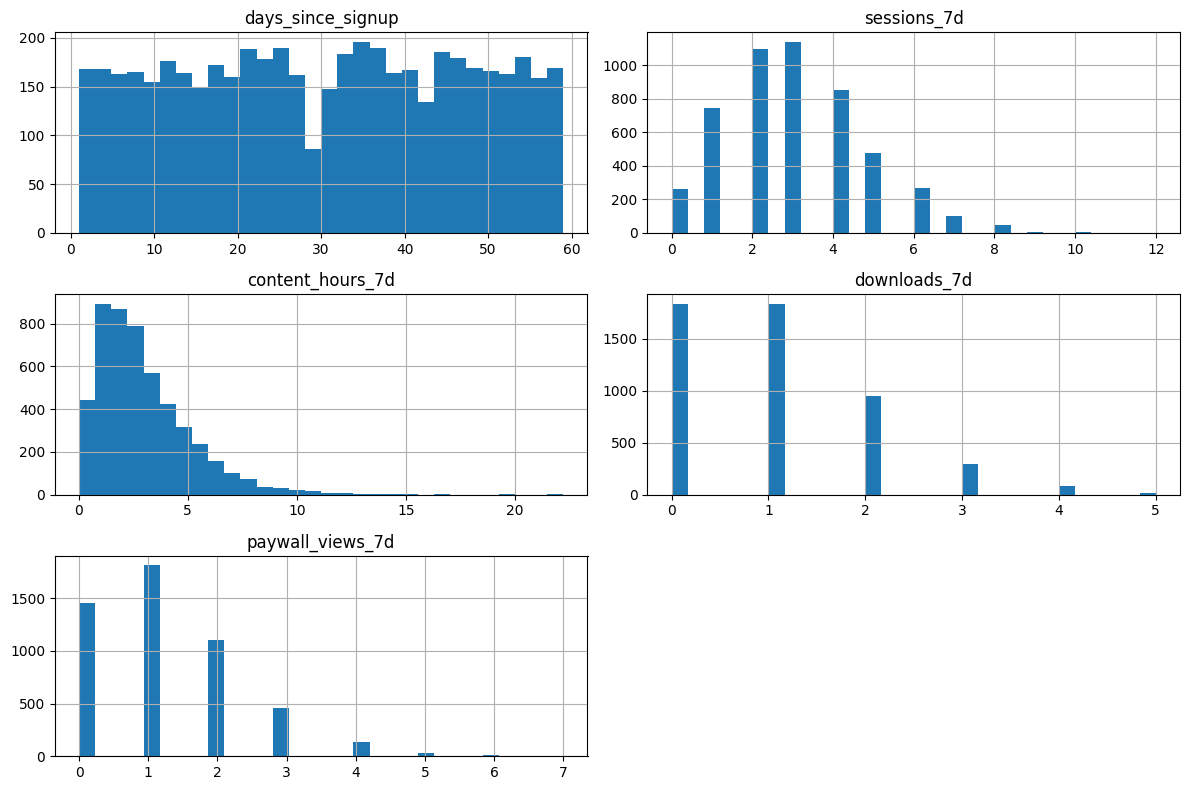

In [20]:
import matplotlib.pyplot as plt

num_cols = [
    "days_since_signup",
    "sessions_7d",
    "content_hours_7d",
    "downloads_7d",
    "paywall_views_7d"
]

df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()


In [21]:
df.groupby("converted")[num_cols].mean()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d
converted,,,,,
0,33.133333,2.288406,2.322159,0.724638,0.882609
1,29.644316,3.106032,3.092237,1.043155,1.280278


In [22]:
pd.crosstab(df["country_tier"], df["converted"], normalize="index")


converted,0,1
country_tier,,
Tier_1,0.089477,0.910523
Tier_2,0.146430,0.853570
Tier_3,0.191718,0.808282


In [23]:
corr = df[num_cols + ["converted"]].corr()
corr["converted"].sort_values(ascending=False)


converted            1.000000
sessions_7d          0.162911
paywall_views_7d     0.124822
content_hours_7d     0.124534
downloads_7d         0.110724
days_since_signup   -0.071169
Name: converted, dtype: float64

In [24]:
X = df.drop(columns=["converted"])
y = df["converted"]


In [25]:
X_encoded = pd.get_dummies(X, columns=["country_tier"], drop_first=True)
X_encoded.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier_Tier_2,country_tier_Tier_3
0,39,5,2.80,0,2,False,False
1,52,1,1.03,2,2,True,False
2,29,4,2.30,1,3,True,False
3,15,4,1.60,0,1,True,False
4,43,4,6.75,2,1,True,False


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3750, 7), (1250, 7))